In [1]:
import numpy as np
import matplotlib.pyplot as plt

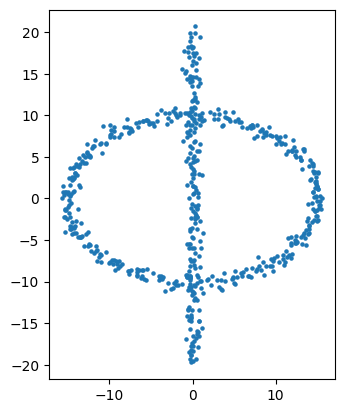

In [2]:
# Generate a random set of points that look like '\phi' (a straight vertical line through the center)

# Number of points for the outer circle and inner "stroke"
num_outer = 400
num_inner = 200

# Outer circle with reduced radius
theta_outer = np.linspace(0, 20 * np.pi, num_outer)
x_outer = 15 * np.cos(theta_outer)
y_outer = 10 * np.sin(theta_outer)

# Inner "stroke" of phi (straight vertical line through center)
y_inner = np.linspace(-20, 20, num_inner)
x_inner = 0 * np.ones(num_inner)

# Add randomness to each coordinate
randomness = 0.5
np.random.seed(42)
x_outer += np.random.normal(0, randomness, num_outer)
y_outer += np.random.normal(0, randomness, num_outer)
x_inner += np.random.normal(0, randomness, num_inner)
y_inner += np.random.normal(0, randomness, num_inner)

# Combine both sets of points into one list of tuples
point_cloud = list(zip(np.concatenate((x_outer, x_inner)), np.concatenate((y_outer, y_inner))))

# Plot to visualize
x_coords, y_coords = zip(*point_cloud)
plt.scatter(x_coords, y_coords, s=5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

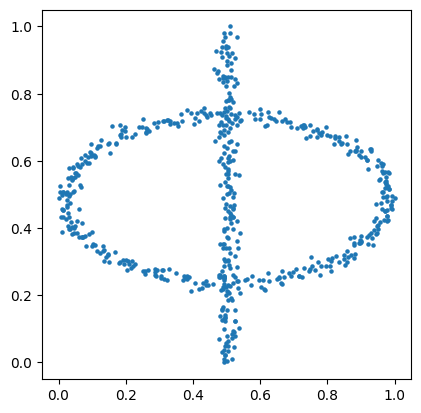

In [3]:
# Different ways to normalize a point cloud

# 1. Min-Max Normalization (Scaling to [0, 1] range)
def min_max_normalize(tuples):
    array = np.array(tuples)
    min_vals = array.min(axis=0)
    max_vals = array.max(axis=0)
    range_vals = np.where(max_vals - min_vals == 0, 1, max_vals - min_vals)
    normalized_array = (array - min_vals) / range_vals
    return [tuple(point) for point in normalized_array]

# 2. Standardization (Z-score Normalization)
def standardize(tuples):
    array = np.array(tuples)
    mean_vals = array.mean(axis=0)
    std_vals = array.std(axis=0)
    std_vals = np.where(std_vals == 0, 1, std_vals)
    standardized_array = (array - mean_vals) / std_vals
    return [tuple(point) for point in standardized_array]

# 3. Mean Normalization (Centers data to approximately [-0.5, 0.5])
def mean_normalize(tuples):
    array = np.array(tuples)
    mean_vals = array.mean(axis=0)
    min_vals = array.min(axis=0)
    max_vals = array.max(axis=0)
    range_vals = np.where(max_vals - min_vals == 0, 1, max_vals - min_vals)
    normalized_array = (array - mean_vals) / range_vals
    return [tuple(point) for point in normalized_array]

# 4. Unit Vector Normalization (Normalize each vector to unit length)
def unit_vector_normalize(tuples):
    array = np.array(tuples)
    norms = np.linalg.norm(array, axis=1, keepdims=True)
    norms = np.where(norms == 0, 1, norms)
    normalized_array = array / norms
    return [tuple(point) for point in normalized_array]

# 5. Robust Scaling (Using Median and IQR)
def robust_scale(tuples):
    array = np.array(tuples)
    median_vals = np.median(array, axis=0)
    q75, q25 = np.percentile(array, [75 ,25], axis=0)
    iqr_vals = np.where((q75 - q25) == 0, 1, q75 - q25)
    scaled_array = (array - median_vals) / iqr_vals
    return [tuple(point) for point in scaled_array]

# 6. Log Transformation (For skewed data)
def log_transform(tuples, shift_constant=1e-5):
    array = np.array(tuples)
    min_val = array.min()
    if min_val <= 0:
        array += abs(min_val) + shift_constant
    log_transformed_array = np.log(array)
    return [tuple(point) for point in log_transformed_array]

# 7. Max-Abs Scaling (Scaling each feature to [-1, 1] by its maximum absolute value)
def max_abs_scale(tuples):
    array = np.array(tuples)
    max_abs_vals = np.max(np.abs(array), axis=0)
    max_abs_vals = np.where(max_abs_vals == 0, 1, max_abs_vals)
    scaled_array = array / max_abs_vals
    return [tuple(point) for point in scaled_array]

# 8. Decimal Scaling (Scaling by a power of 10 to fit [-1, 1])
def decimal_scale(tuples):
    array = np.array(tuples)
    max_abs_vals = np.max(np.abs(array), axis=0)
    j_vals = np.ceil(np.log10(np.where(max_abs_vals == 0, 1, max_abs_vals)))
    scaled_array = array / (10 ** j_vals)
    return [tuple(point) for point in scaled_array]

normalized_point_cloud = min_max_normalize(point_cloud)
x_coords, y_coords = zip(*normalized_point_cloud)
plt.scatter(x_coords, y_coords, s=5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [4]:
def divide_unit_n_cube(n, m, overlap = 0.2):
    # Define the step size for each division
    step = 1.0 / m
    overlap = overlap * step
    
    # Create grid points for each dimension
    grid_points = [np.linspace(0, 1 - step, m) for _ in range(n)]
    
    # Generate all possible starting points for the small cubes
    small_cubes = []
    for indices in np.ndindex(*[m] * n):
        cube_bounds = []
        for dim, idx in enumerate(indices):
            lower_bound = grid_points[dim][idx] - overlap
            upper_bound = lower_bound + step + 2 * overlap
            cube_bounds.append((lower_bound, upper_bound))
        small_cubes.append(tuple(cube_bounds))
    
    return small_cubes

def dummy_process(point):
    return point

def projection_process(point):
    # Here we use the simple mapping function f(x,y) = (y,), projecting the xy-coordinates to the y-coordinate
    return (point[1],)

def preimage_cover(point_cloud, cover_codomain,process_function):
    cover_domain = {item: [] for item in cover_codomain}
    for point in point_cloud:
        image = process_function(point)
        for item in cover_codomain:
            for i in range(len(item)):
                if image[i] > item[i][0] and image[i] < item[i][1]:
                    pass
                else:
                    continue
                if i == len(item)-1:
                    cover_domain[item].append(point)

    return cover_domain

n = 1  # Dimensions
m = 6  # Divisions per dimension
cover_codomain = divide_unit_n_cube(n, m)

cover_domain = preimage_cover(normalized_point_cloud, cover_codomain, projection_process)

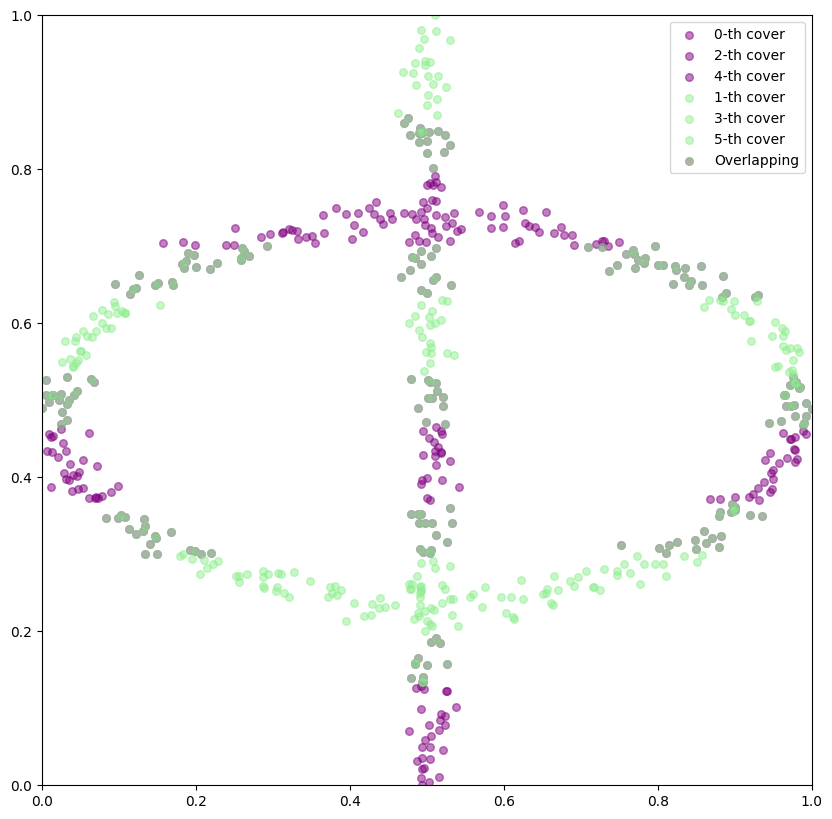

In [5]:
colors = ['#800080','#90EE90']

plt.figure(figsize=(10, 10))

for key, values in cover_domain.items():
    index = list(cover_domain.keys()).index(key)
    if index%2 == 0:
        x_coords, y_coords = zip(*values)
        plt.scatter(x_coords, y_coords, s=30, c=colors[index%2], alpha = 0.5, label = str(index)+'-th cover')
        
for key, values in cover_domain.items():
    index = list(cover_domain.keys()).index(key)
    if index%2 == 1:
        x_coords, y_coords = zip(*values)
        plt.scatter(x_coords, y_coords, s=30, c=colors[index%2], alpha = 0.5, label = str(index)+'-th cover')

plt.scatter([-10], [-10], s=30, c='#AAB5A6', label = 'Overlapping')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

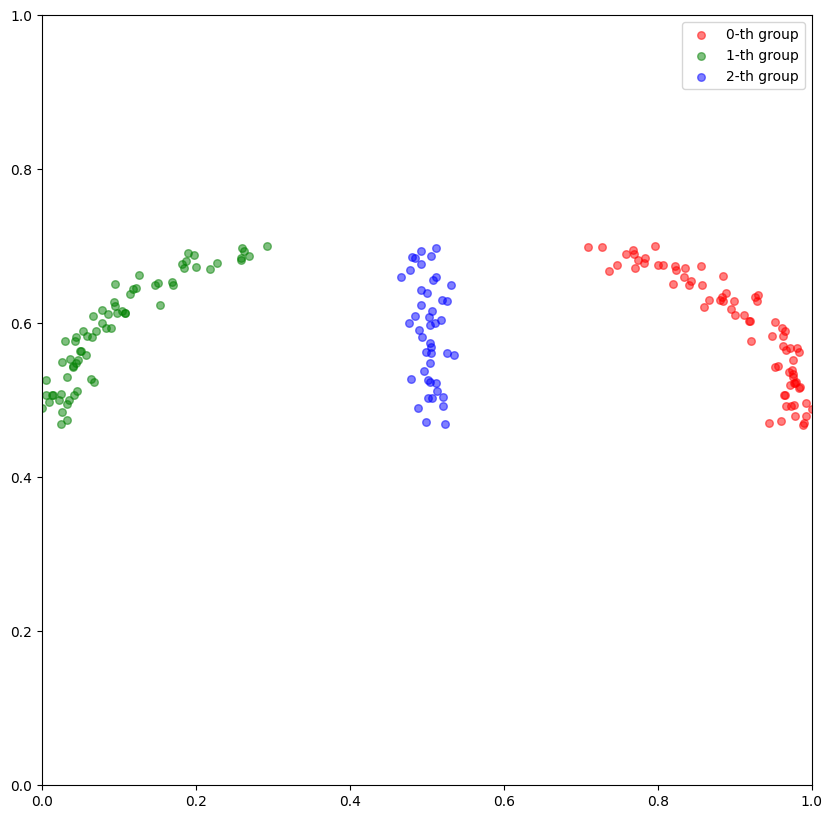

In [6]:
from sklearn.cluster import DBSCAN

def dbscan_clustering(points, eps=0.1, min_samples=5):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(points)
    clusters = {}
    for label in set(labels):
        clusters[label] = [point for point, l in zip(points, labels) if l == label]
    return clusters

# which cover to cluster?
k = 3
k = k % len(cover_domain)
clusters = dbscan_clustering(cover_domain[list(cover_domain.keys())[k]])

colors = ['r', 'g', 'b', 'y', 'c','m', 'k', 'w']

plt.figure(figsize=(10, 10))
for key, values in clusters.items():
    x_coords, y_coords = zip(*values)
    plt.scatter(x_coords, y_coords, s=30, c=colors[key], alpha = 0.5, label = str(key)+'-th group')

plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [7]:
flat_clusters = {}

# Counter to ensure unique keys for each cluster
for outer_key, points in cover_domain.items():
    # Get clusters for each set of points
    clusters = dbscan_clustering(points)
    # Flatten each cluster into the final dictionary
    for cluster_label, cluster_points in clusters.items():
        # Create a unique key for each cluster
        unique_key = f"{outer_key}_cluster_{cluster_label}"
        flat_clusters[unique_key] = cluster_points

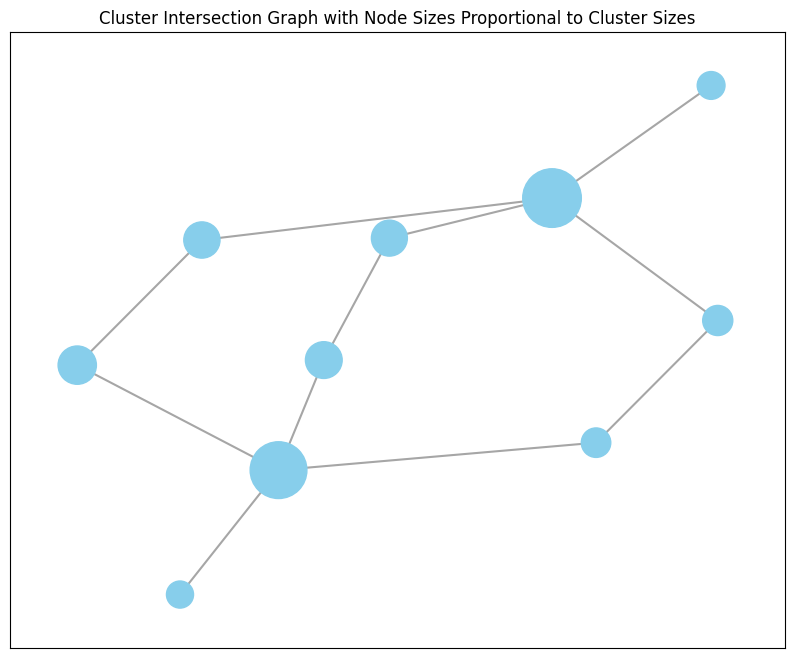

In [8]:
import networkx as nx

# Initialize a new graph
G = nx.Graph()

# Step 1: Add vertices for each key in flat_clusters
for cluster_key in flat_clusters:
    G.add_node(cluster_key)

# Step 2: Add edges based on non-empty intersections
for key1, cluster1 in flat_clusters.items():
    for key2, cluster2 in flat_clusters.items():
        if key1 < key2:  # Avoid duplicate edges and self-loops
            # Check if the intersection of cluster1 and cluster2 is non-empty
            if set(cluster1).intersection(cluster2):
                G.add_edge(key1, key2)

node_sizes = [len(flat_clusters[node]) * 10 for node in G.nodes]  # Scale factor to adjust sizes visually

# Visualize the graph with variable node sizes
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)

# Draw nodes with sizes proportional to cluster sizes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="skyblue")
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.7, edge_color="gray")

# Display the plot
plt.title("Cluster Intersection Graph with Node Sizes Proportional to Cluster Sizes")
plt.show()